In [211]:
import numpy as np
from ssa import *
from lds import *
import matplotlib.pyplot as plt

In [212]:
eps = 0.03
target = -0.1

In [213]:
n=32

In [214]:
A = np.random.normal(0, 1.0, size=(n, n))

In [215]:
fAs(A, 0.0)[0:2]

(50.6327656804045, 70.25811315692195)

In [216]:
s_absc = np.max([np.real(eig) for eig in np.linalg.eigvals(A)])
s_absc

7.083716292151801

In [217]:
a_e, del_s_a_e = ssa(A, eps, start_at_absc = True, method="newton")

In [218]:
print(f"smoothed spectral abscissa: {a_e}")
print(f"spectral_abscissa: {s_absc}")

smoothed spectral abscissa: 7.122457990900445
spectral_abscissa: 7.083716292151801


In [219]:
orig_A = np.copy(A)
B, s_abscs, ss_abscs = optimize_ssa(A, eps, target, step_size=1.0, iters=50, show_prog=True)

100%|██████████| 50/50 [00:00<00:00, 208.54it/s]


In [220]:
ss_abscs[-1]

-0.0998414137819952

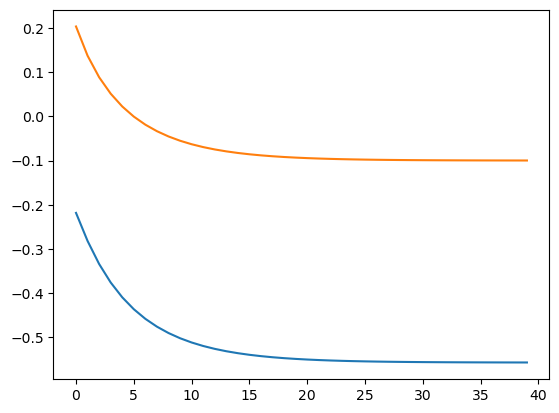

In [221]:
plt.plot(s_abscs[10:50])
plt.plot(ss_abscs[10:50])

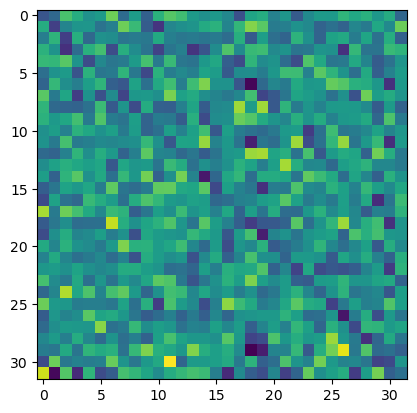

In [222]:
plt.imshow(B)

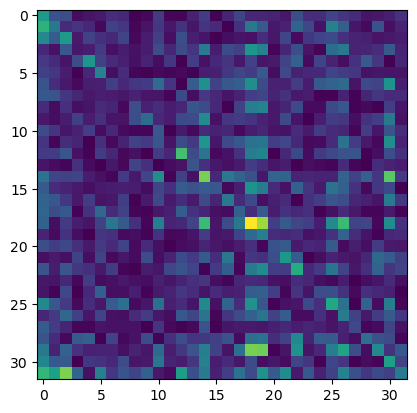

In [223]:
plt.imshow(np.abs(orig_A - B))

In [224]:
def graph_fAs(pr=False):
    xs = np.linspace(a_e - 2.0, a_e + 2.0, num=50)
    ys = np.array([fAs(A, x, False)[0] for x in xs])
    if pr: print(ys)

    plt.plot(xs, ys)
    plt.vlines([s_absc], ymin=np.min(ys) - 10.0, ymax=np.max(ys) + 10.0, colors="BLACK", linestyles="dashed", label="abscissa")
    plt.vlines([a_e], ymin=np.min(ys) - 10.0, ymax=np.max(ys) + 10.0, colors="RED", linestyles="dashed", label="a_e")
    plt.show()

In [225]:
C = np.copy(B)

In [226]:
C = mutate(C, eps, target, step_size=0.01)
ssa(C, eps)[0]

-0.09879493505678631

In [227]:
x_0 = np.zeros(shape=(n,))
x_0[0] = 1.0

In [228]:
B_xs = lds(B, x_0, iters=500, dt=0.003)
C_xs = lds(C, x_0, iters=500, dt=0.003)

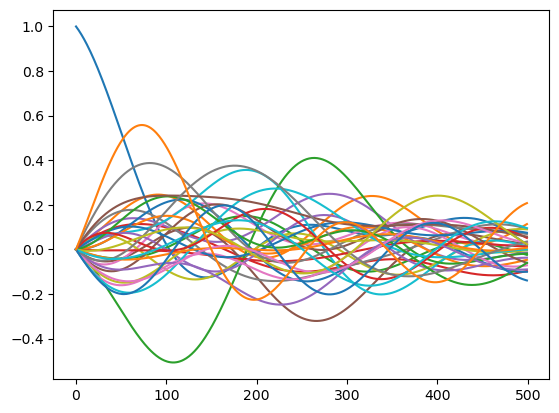

In [229]:
plt.plot(B_xs)
plt.show()

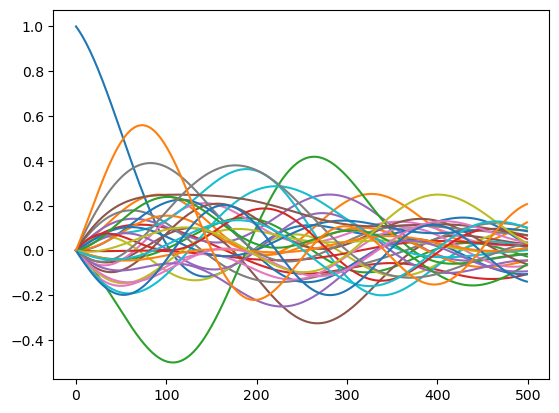

In [230]:
plt.plot(C_xs)
plt.show()

0.020211700601820093
0.31982017041453903


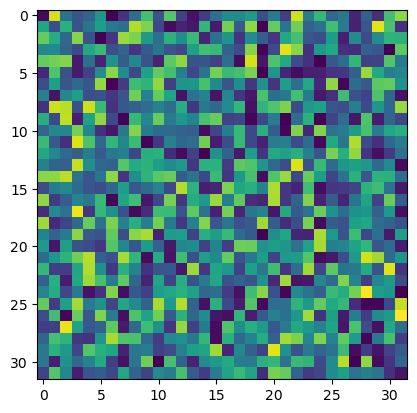

In [231]:
print(np.max(np.abs(C-B)))
print(np.sqrt(np.sum(np.power(C - B, 2.0))))
plt.imshow(np.abs(C - B))

(array([  8.,  24.,  73., 165., 218., 265., 177.,  70.,  20.,   4.]),
 array([-3.88074497e+00, -3.10489856e+00, -2.32905215e+00, -1.55320574e+00,
        -7.77359333e-01, -1.51292251e-03,  7.74333488e-01,  1.55017990e+00,
         2.32602631e+00,  3.10187272e+00,  3.87771913e+00]),
 <BarContainer object of 10 artists>)

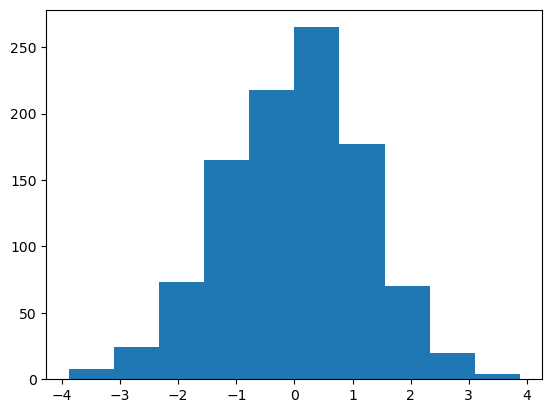

In [232]:
plt.hist(np.ravel(C))

In [233]:
D = np.copy(B)
xs, tangent_thetas, abscs, s_abscs, s_norms, F_norms = linear_hebbian_stable(D, x_0, eps, target, iters=500, beta=0.0, dA=0.02)

KeyboardInterrupt: 

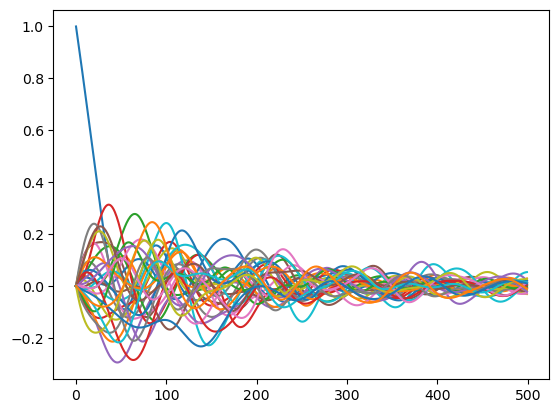

In [ ]:
plt.plot(xs)
plt.show()

In [ ]:
D_xs = lds(D, x_0, iters=500, dt=0.01)

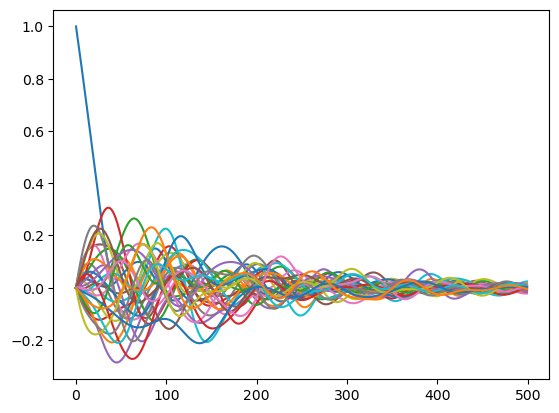

In [ ]:
plt.plot(D_xs)
plt.show()

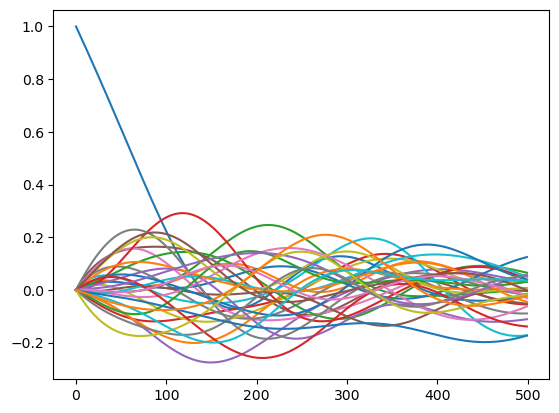

In [ ]:
plt.plot(B_xs)
plt.show()

0.0
0.0


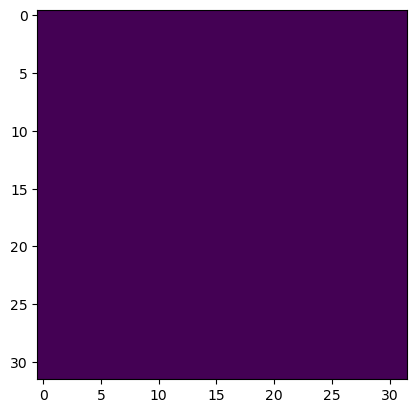

In [ ]:
print(np.max(np.abs(D-B)))
print(np.sqrt(np.sum(np.power(D - B, 2.0))))
plt.imshow(np.abs(D - B))